In [702]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [703]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [704]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
Passenger_id = test_data["PassengerId"]

In [705]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [706]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [707]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [708]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [709]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [710]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d8f34b5d0>,
      dtype=object)

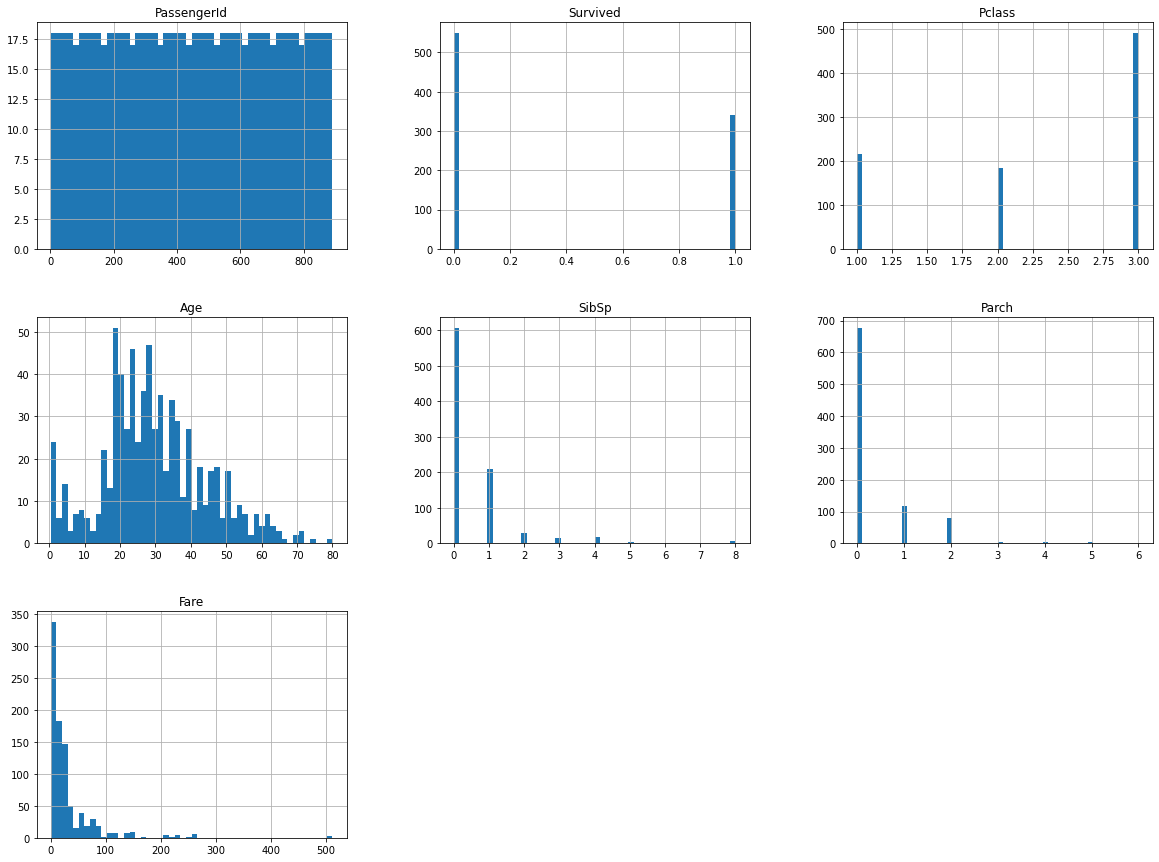

In [711]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50,figsize=(20,15))

In [712]:
corr_matrix = train_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [713]:
#converting categorical values to numerical

In [714]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [715]:
#Identified categorical values: Sex, Embarked

In [716]:
train_data.value_counts("Sex")

Sex
male      577
female    314
dtype: int64

In [717]:
train_data.value_counts("Embarked")

Embarked
S    644
C    168
Q     77
dtype: int64

In [718]:
train_data = train_data.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)
test_data = test_data.drop(["Name"],axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [719]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 
train_data['Sex']= encoder.fit_transform(train_data['Sex'])
train_data.head() #Male is transformed to 1, Female is transformed to 0

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [720]:
train_data.value_counts("Embarked")

Embarked
S    644
C    168
Q     77
dtype: int64

In [721]:
#Filling NA with Mean
train_data['Embarked'] = train_data['Embarked'].fillna('S')
#Converting categorical values to integers
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [722]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [723]:
#converting Fare feature from float to int
for i,j in enumerate(train_data["Fare"]):
    train_data["Fare"][i] = int(j)
train_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.0,0
1,1,1,0,38.0,1,0,71.0,1
2,1,3,0,26.0,0,0,7.0,0
3,1,1,0,35.0,1,0,53.0,0
4,0,3,1,35.0,0,0,8.0,0


In [724]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.0,0
1,1,1,0,38.0,1,0,71.0,1
2,1,3,0,26.0,0,0,7.0,0
3,1,1,0,35.0,1,0,53.0,0
4,0,3,1,35.0,0,0,8.0,0


In [725]:
train_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257482,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.550553,0.045702
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182331,-0.116569
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096284,0.010171
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159506,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216252,-0.078665
Fare,0.257482,-0.550553,-0.182331,0.096284,0.159506,0.216252,1.000000,0.061061
Embarked,0.106811,0.045702,-0.116569,0.010171,-0.059961,-0.078665,0.061061,1.000000


In [726]:
# Mapping Fare
train_data.loc[ train_data['Fare'] <= 7.91, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7.91) & (train_data['Fare'] <= 14.454), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 14.454) & (train_data['Fare'] <= 31), 'Fare']   = 2
train_data.loc[ train_data['Fare'] > 31, 'Fare'] = 3
train_data['Fare'] = train_data['Fare'].astype(int)

In [727]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,0,0
1,1,1,0,38.0,1,0,3,1
2,1,3,0,26.0,0,0,0,0
3,1,1,0,35.0,1,0,3,0
4,0,3,1,35.0,0,0,1,0


In [728]:
age_avg = train_data['Age'].mean()
train_data['Age'] = train_data['Age'].fillna(age_avg)

In [729]:
# Mapping Age
train_data['Age'] = train_data['Age'].astype(int)
train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[ train_data['Age'] > 64, 'Age'] = 4 ;

In [730]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,0,0
1,1,1,0,2,1,0,3,1
2,1,3,0,1,0,0,0,0
3,1,1,0,2,1,0,3,0
4,0,3,1,2,0,0,1,0


In [731]:
# Preparing Testing Set

In [732]:
test_data = test_data.drop(["PassengerId","Ticket","Cabin"],axis = 1)

In [733]:
#Filling NA with Mean
test_data['Embarked'] = test_data['Embarked'].fillna('S')
#Converting categorical values to integers
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [734]:
#converting Fare feature from float to int
fare_avg = test_data['Fare'].mean()
test_data['Fare'] = test_data['Fare'].fillna(fare_avg)
for i,j in enumerate(test_data["Fare"]):
    test_data["Fare"][i] = int(j)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [735]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 
test_data['Sex']= encoder.fit_transform(test_data['Sex'])
#Male is transformed to 1, Female is transformed to 0

In [736]:
#Fill Age NA values
age_avg = test_data['Age'].mean()
test_data['Age'] = test_data['Age'].fillna(age_avg)

In [737]:
# Mapping Age
test_data['Age'] = test_data['Age'].astype(int)
test_data.loc[ test_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age'] = 1
test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age'] = 2
test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[ test_data['Age'] > 64, 'Age'] = 4 ;

In [738]:
# Mapping Fare
test_data.loc[ test_data['Fare'] <= 7.91, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare'] <= 14.454), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 31), 'Fare']   = 2
test_data.loc[ test_data['Fare'] > 31, 'Fare'] = 3
test_data['Fare'] = test_data['Fare'].astype(int)

In [739]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,0,2
1,3,0,2,1,0,0,0
2,2,1,3,0,0,1,2
3,3,1,1,0,0,1,0
4,3,0,1,1,1,1,0


In [740]:
# Modelling

In [741]:
labels = train_data["Survived"]
x_train = train_data.drop(['Survived'], axis=1)

In [742]:
#Modelling using Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,labels)

LinearRegression()

In [743]:
#Predictions from Linear Regression
print("Predictions: ", lin_reg.predict(train_data[:5].drop(["Survived"],axis=1)))
print("Labels: ",list(train_data[:5]["Survived"]))

Predictions:  [0.03952167 0.91369128 0.59426948 0.87444055 0.04801953]
Labels:  [0, 1, 1, 1, 0]


In [744]:
#Calculating RMSE for Linear Regression Model
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(train_data.drop(['Survived'], axis=1)).astype(int)
lin_mse = mean_squared_error(labels,predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6002244249190134

In [745]:
#Using Model with Test Set
from math import ceil,floor,trunc

def normal_round(n):
    if n - floor(n) < 0.5:
        return floor(n)
    return ceil(n)

submission = pd.read_csv('../input/titanic/gender_submission.csv')
submission["Survived"] = lin_reg.predict(test_data).astype(int)
for i,j in enumerate(submission["Survived"]):
    submission["Survived"][i] = normal_round(round(j,1))
for i,j in enumerate(submission["Survived"]):
    submission["Survived"][i] = int(trunc(j))
submission.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [746]:
submission.to_csv("submission_final.csv",index=False)
